In [8]:
## packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
from ipywidgets import interact
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
raw_data = pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unscrape_books/users_2000_book_details.csv', dtype={'rating':np.float64})
# remove all entries which have no genre mentioned, this essentially removes all other NaNs also. In total, we have 199 rows removed
raw_data=raw_data[-raw_data['genre'].isnull()]
## split different genres into different columsn
def get_genre(x, n):
    try:
        return x.split(';')[n-1].lstrip()
    except (AttributeError,TypeError,IndexError):
        return x.split(';')[0].lstrip()
raw_data['genre1']=raw_data['genre'].apply(get_genre,args=[1])
raw_data['genre2']=raw_data['genre'].apply(get_genre,args=[2])
raw_data['genre3']=raw_data['genre'].apply(get_genre,args=[3])
raw_data['genre4']=raw_data['genre'].apply(get_genre,args=[4])
raw_data['genre5']=raw_data['genre'].apply(get_genre,args=[5])
raw_data['genre6']=raw_data['genre'].apply(get_genre,args=[6])

/Users/rahuldhakecha/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning:

Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
# pd.options.display.max_rows = 4000
old_new_genres=pd.read_csv('/Users/rahuldhakecha/coursesfall2017/goodreads/files/top_2000_user_perspective/unique_genres_reduced_set_JE.csv')
old_new_genres=old_new_genres.drop_duplicates()
#replace with new genre categorizatoion
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre1')
# del raw_data['genre1']
raw_data=raw_data.rename(columns={'New_genre':'New_genre1'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre2')
# del raw_data['genre2']
raw_data=raw_data.rename(columns={'New_genre':'New_genre2'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre3')
# del raw_data['genre3']
raw_data=raw_data.rename(columns={'New_genre':'New_genre3'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre4')
# del raw_data['genre4']
raw_data=raw_data.rename(columns={'New_genre':'New_genre4'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre5')
# del raw_data['genre5']
raw_data=raw_data.rename(columns={'New_genre':'New_genre5'})
raw_data=raw_data.join(old_new_genres.set_index('Old_genre'),on='genre6')
# del raw_data['genre6']
raw_data=raw_data.rename(columns={'New_genre':'New_genre6'})

In [4]:
#Fiction doesn't carry much information; therefore we remove it and replace it with next different categorization
def replace_fiction(x):
    try:
        i=0
        while x[i]=='Fiction':
            i+=1
        return x[i]
    except IndexError:
        return x[0]
data_wo_fiction=raw_data
data_wo_fiction['New_genre']=raw_data[['New_genre1','New_genre2','New_genre3','New_genre4','New_genre5','New_genre6']].apply(replace_fiction,axis=1)

In [92]:
## for our initial analysis we focus on user_id, book_id and New_genre
pre_data=data_wo_fiction[['user_id','book_id','book_title','New_genre']]
pre_data = pre_data[pre_data['New_genre']!='Fiction']
pre_data = pre_data[pre_data['New_genre']!='Nonfiction']
pre_data = pre_data[pre_data['New_genre']!='Christian Fiction']
pre_data = pre_data[pre_data['New_genre']!='Queer Fiction']
pre_data = pre_data[pre_data['New_genre']!='Westerns']

In [84]:
# we can find cross table for user and genres
user_genre_cross=pd.crosstab(pre_data['user_id'],pre_data['New_genre'])

In [58]:
user_genre_cross

New_genre,Childrens,Erotic Fiction,Fantasy,Graphic Novels,Historical Fiction,Horror Suspense,Literary Fiction,Mystery Crime Detective,Romance,Science Fiction,Thriller,Womens Fiction,YA
user_id,,,,,,,,,,,,,
5231,65,6,9,9,45,4,66,15,5,4,0,31,25
13699,7,2,6,28,29,1,180,6,4,7,0,1,14
15411,0,2,193,0,89,11,3,358,157,13,4,45,91
21659,27,12,125,49,59,4,59,17,86,54,2,5,56
27435,1,13,11,0,71,9,53,71,24,15,6,114,40
27539,12,1,45,40,30,2,26,17,6,11,1,0,72
31186,1,1,27,36,12,2,9,5,1,50,0,1,9
31879,8,1,80,2,10,11,77,8,0,36,1,0,9
32014,2,0,33,3,50,2,24,64,6,2,0,18,10


In [85]:
pca= decomposition.PCA(n_components=2)
df_pca = pca.fit_transform(user_genre_cross)

In [89]:
comps=pd.DataFrame(pca.components_,columns=list(user_genre_cross))
abs(comps.ix[0]).nlargest(5)

Romance           0.961483
Fantasy           0.223441
Erotic Fiction    0.111412
YA                0.071962
Graphic Novels    0.057322
Name: 0, dtype: float64

In [69]:
comps.ix[0]

Childrens                 -0.028523
Erotic Fiction             0.111412
Fantasy                    0.223441
Graphic Novels            -0.057322
Historical Fiction        -0.020819
Horror Suspense           -0.004450
Literary Fiction          -0.050355
Mystery Crime Detective    0.026822
Romance                    0.961483
Science Fiction            0.006259
Thriller                   0.002351
Womens Fiction             0.013443
YA                         0.071962
Name: 0, dtype: float64

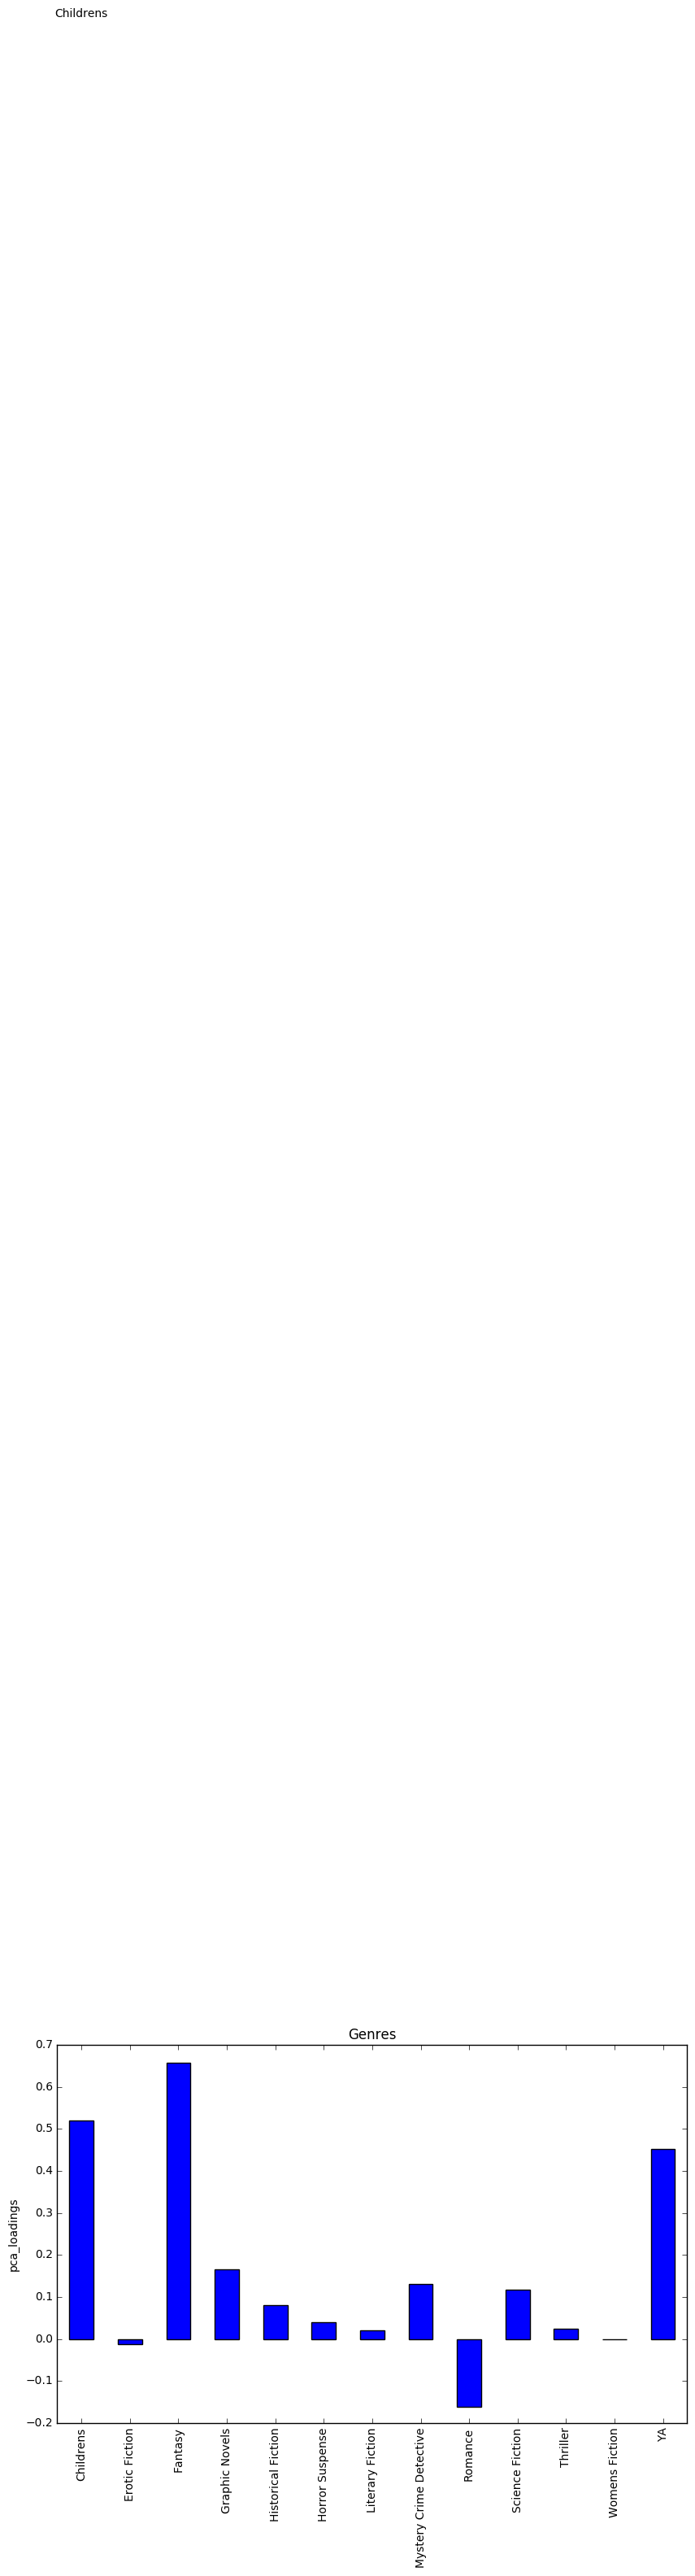

In [60]:
## plot for PCA loadings
def PCA_loadings(p):
    freq_series=pd.Series(pca.components_[int(p),:])
    plt.figure(figsize=(10, 6))
    ax = freq_series.plot(kind='bar')
    ax.set_ylabel('pca_loadings')
    ax.set_title('Genres')
    ax.set_xticklabels(list(user_genre_cross),rotation=90)
    rects = ax.patches
    labels=list(user_genre_cross)
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
        plt.show()
interact(PCA_loadings, p=range(0,17))

In [22]:
pca.explained_variance_ratio_

array([ 0.28049351,  0.19919691])

In [25]:
df_pca[:,0]

array([ -89.57223976, -104.46303511,  144.3785688 , ...,   40.21493836,
        -13.28612977,  -37.90566918])

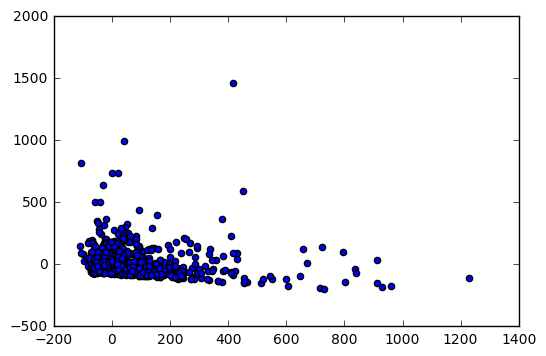

In [61]:
plt.scatter(df_pca[:,0],df_pca[:,1])
plt.show()

In [55]:
df_pca

array([[ -89.57224072,   99.49343309],
       [-104.46303566,  104.38463765],
       [ 144.37856764,   79.76069121],
       ..., 
       [  40.21493862,   -9.41481122],
       [ -13.28612991,  -56.04629698],
       [ -37.90566905,  -50.58602327]])

In [93]:
############# Analysis based on books as columns
user_book_cross=pd.crosstab(pre_data['user_id'],pre_data['book_title'])

In [94]:
pca_book= decomposition.PCA()
df_pca_book = pca_book.fit_transform(user_book_cross)

In [95]:
comps_book=pd.DataFrame(pca_book.components_,columns=list(user_book_cross))
abs(comps_book.ix[0]).nlargest(10)

The Fault in Our Stars                     0.108036
Divergent (Divergent #)1)                  0.105994
Mockingjay (The Hunger Games #)3)          0.101212
The Hunger Games (The Hunger Games #)1)    0.098403
Catching Fire (The Hunger Games #)2)       0.097672
Gone Girl                                  0.086590
Insurgent (Divergent #)2)                  0.084012
Eleanor & Park                             0.082678
Fangirl                                    0.077585
The Night Circus                           0.077519
Name: 0, dtype: float64

In [96]:
abs(comps_book.ix[1]).nlargest(10)

All the Light We Cannot See                                      0.091979
The Goldfinch                                                    0.069573
The Girl on the Train                                            0.067350
Gone Girl                                                        0.066864
Room                                                             0.066355
Orphan Train                                                     0.065988
The Help                                                         0.063042
The Book Thief                                                   0.062462
The Light Between Oceans                                         0.061295
A Court of Thorns and Roses (A Court of Thorns and Roses #)1)    0.061068
Name: 1, dtype: float64

In [98]:
abs(comps_book.ix[3]).nlargest(10)

The Girl on the Train                      0.109366
Me Before You (Me Before You #)1)          0.090424
The Hunger Games (The Hunger Games #)1)    0.087399
Big Little Lies                            0.087213
The Husband's Secret                       0.084302
Mockingjay (The Hunger Games #)3)          0.080946
Catching Fire (The Hunger Games #)2)       0.078633
All the Light We Cannot See                0.076859
The Nightingale                            0.075557
We Were Liars                              0.074778
Name: 3, dtype: float64

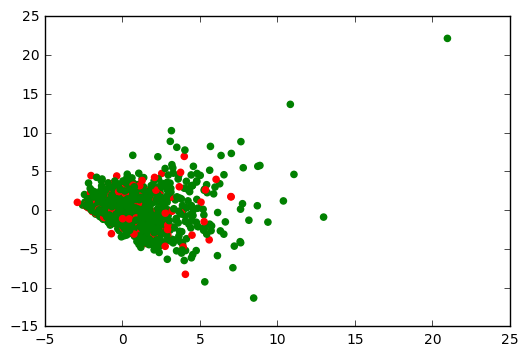

In [102]:
labl = pre_data['New_genre']
color= ['red' if l == 'Fantasy' else 'green' for l in labl]
plt.scatter(df_pca_book[:,0],df_pca_book[:,1], color=color)
plt.show()

In [ ]:
## Multiple Correspondence Analysis
import mca
mca_df = mca.MCA(user_book_cross)